In [30]:
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [31]:
def load_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['f(S)'], kv_data['Lambda'], kv_data['AF']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W

def load_time_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['f(S)'], kv_data['Lambda'], kv_data['Time']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W


progress:1/200
progress:2/200
progress:3/200
progress:4/200
progress:5/200
progress:6/200
progress:7/200
progress:8/200
progress:9/200
progress:10/200
progress:11/200
progress:12/200
progress:13/200
progress:14/200
progress:15/200
progress:16/200
progress:17/200
progress:18/200
progress:19/200
progress:20/200
progress:21/200
progress:22/200
progress:23/200
progress:24/200
progress:25/200
progress:26/200
progress:27/200
progress:28/200
progress:29/200
progress:30/200
progress:31/200
progress:32/200
progress:33/200
progress:34/200
progress:35/200
progress:36/200
progress:37/200
progress:38/200
progress:39/200
progress:40/200
progress:41/200
progress:42/200
progress:43/200
progress:44/200
progress:45/200
progress:46/200
progress:47/200
progress:48/200
progress:49/200
progress:50/200
progress:51/200
progress:52/200
progress:53/200
progress:54/200
progress:55/200
progress:56/200
progress:57/200
progress:58/200
progress:59/200
progress:60/200
progress:61/200
progress:62/200
progress:63/200
p

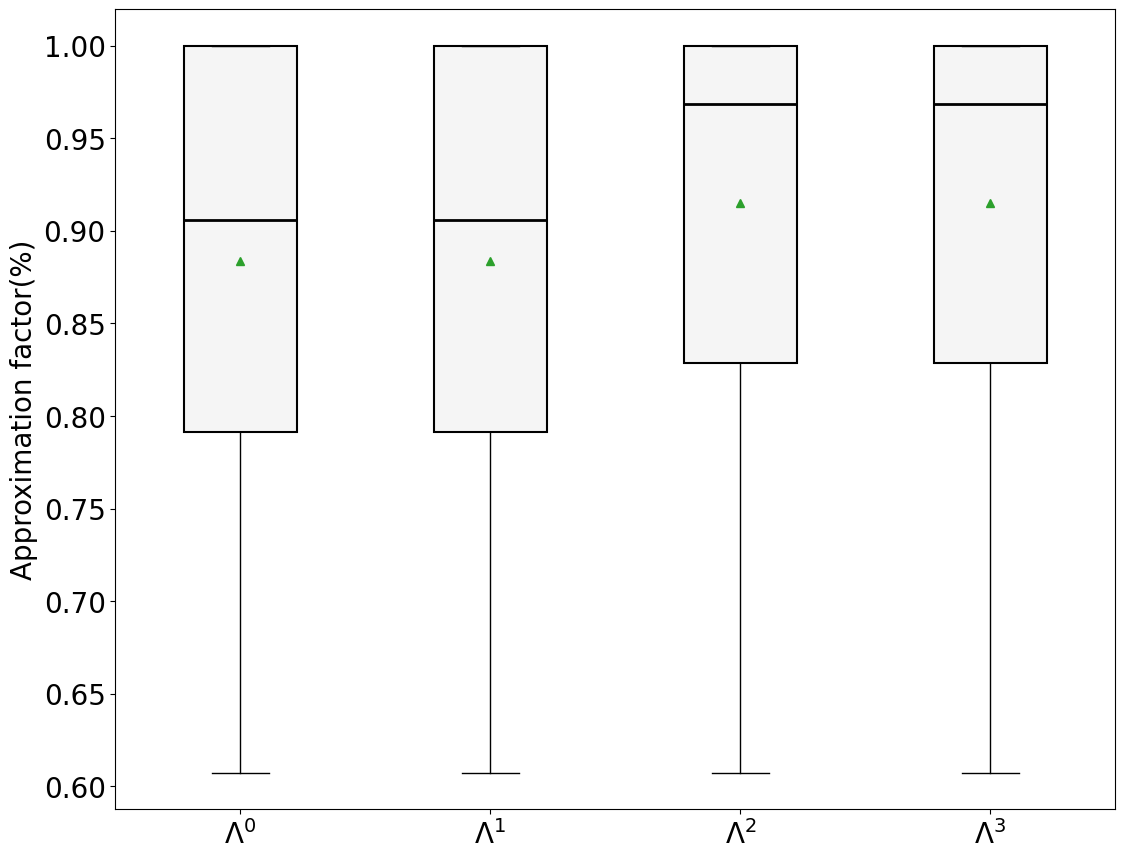

In [76]:
upper_bounds = ["ub1", "ub7", "ub7m"]
algos = ["greedy_max"]
# task_name = "FacebookGraphCoverage"
# task_name = "CalTechMaximization"
task_name = "AdultIncomeFeatureSelection"
# task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 100

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    "ub1m",
    "ub7",
    "ub7m"
]
ub_title_dict = {
    "ub1": r"$\Lambda^0$",
    "ub1m": r"$\Lambda^1$",
    "ub7": r"$\Lambda^2$",
    "ub7m":r"$\Lambda^3$",
}
ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

budget_range = list(range(5, 31))

for seed in seed_range:
    root_dir = os.path.join("../result/archive-4", path_dict[task_name] + suffix, f"{n}-{sample}",f"{seed}")
    
    for i in range(0, len(ub_list)):
        ub = ub_list[i]
        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        for idx in range(0, len(X)):
            b = X[idx]
            af = W[idx]
            if b in budget_range:
                ub_mean_list[i].append(af)

    print(f"progress:{seed + 1}/{200}")
    
print(f"0:{np.mean(ub_mean_list[0])},1:{np.mean(ub_mean_list[1])},2:{np.mean(ub_mean_list[2])},3:{np.mean(ub_mean_list[3])}")

data = ub_mean_list

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor(%)")
# ax.set_ylabel("Computational time(s)")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)

bp = ax.boxplot(data, patch_artist=True, showfliers=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

for median in bp["medians"]:
    median.set_color("black")

for box in bp["boxes"]:
    box.set_facecolor("whitesmoke")


plt.show()

In [56]:
upper_bounds = ["ub1", "ub7", "ub7m"]
algos = ["greedy_max"]
task_name = "FacebookGraphCoverage"
# task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
# task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 500

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    "ub1m",
    "ub7",
    "ub7m"
]
# ub_title_dict = {
#     "ub1": "Upper bound 0",
#     "ub1m": "Upper bound 1",
#     "ub7": "Upper bound 2",
#     "ub7m":"Upper bound 3",
# }
ub_title_dict = {
    "ub1": r"\Lambda^0",
    "ub1m": r"\Lambda^1",
    "ub7": r"\Lambda^2",
    "ub7m":r"\Lambda^3",
}
ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

for seed in seed_range:
    root_dir = os.path.join("../result/archive-4", path_dict[task_name] + suffix, f"{n}",f"{seed}")
    
    for i in range(0, len(ub_list)):
        ub = ub_list[i]
        X, Y, Z, W = load_time_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        ub_mean_list[i] = ub_mean_list + list(W)

    print(f"progress:{seed + 1}/{200}")
    

print(f"0:{np.mean(ub_mean_list[0])},1:{np.mean(ub_mean_list[1])},2:{np.mean(ub_mean_list[2])},3:{np.mean(ub_mean_list[3])}")

data = ub_mean_list

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Running time(s)")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)

bp = ax.boxplot(data, patch_artist=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

for median in bp["medians"]:
    median.set_color("black")

for box in bp["boxes"]:
    box.set_facecolor("whitesmoke")


plt.show()

progress:1/200
progress:2/200
progress:3/200
progress:4/200
progress:5/200
progress:6/200
progress:7/200
progress:8/200
progress:9/200
progress:10/200
progress:11/200
progress:12/200
progress:13/200
progress:14/200
progress:15/200
progress:16/200
progress:17/200
progress:18/200
progress:19/200
progress:20/200
progress:21/200
progress:22/200
progress:23/200
progress:24/200
progress:25/200
progress:26/200
progress:27/200
progress:28/200
progress:29/200
progress:30/200
progress:31/200
progress:32/200
progress:33/200
progress:34/200
progress:35/200
progress:36/200
progress:37/200
progress:38/200
progress:39/200
progress:40/200
progress:41/200
progress:42/200
progress:43/200
progress:44/200
progress:45/200
progress:46/200
progress:47/200
progress:48/200
progress:49/200
progress:50/200
progress:51/200
progress:52/200
progress:53/200
progress:54/200
progress:55/200
progress:56/200
progress:57/200
progress:58/200
progress:59/200
progress:60/200
progress:61/200
progress:62/200
progress:63/200
p

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (30,) + inhomogeneous part.

seed:0, bd:5, af:0.6374000007829979
seed:0, bd:6, af:0.9166307175829825
seed:0, bd:7, af:0.9803979445169438
seed:0, bd:8, af:0.8986523455337496
seed:0, bd:9, af:0.9552310751432677
seed:0, bd:10, af:0.887901812213587
seed:0, bd:11, af:0.9292716927456178
seed:0, bd:12, af:0.8729232285760499
seed:0, bd:13, af:0.8765994547004784
seed:0, bd:14, af:0.8641442206080773
seed:0, bd:15, af:0.831222007167379
seed:0, bd:16, af:0.8259859559189313
seed:0, bd:17, af:0.7893229825119625
seed:0, bd:18, af:0.8032141856660945
seed:0, bd:19, af:0.7906593068186342
seed:0, bd:20, af:0.8031870864850661
seed:0, bd:21, af:0.8002339050024699
seed:0, bd:22, af:0.812421583587212
seed:0, bd:23, af:0.8028909039349369
seed:0, bd:24, af:0.8196607752489186
seed:0, bd:25, af:0.8102741609005977
seed:0, bd:26, af:0.822433419599072
seed:0, bd:27, af:0.8138547462717977
seed:0, bd:28, af:0.8210733756445389
seed:0, bd:29, af:0.825086811200025
seed:0, bd:30, af:0.817204388601923
progress:1/200
seed:1, bd:5, af:0.730269787476899

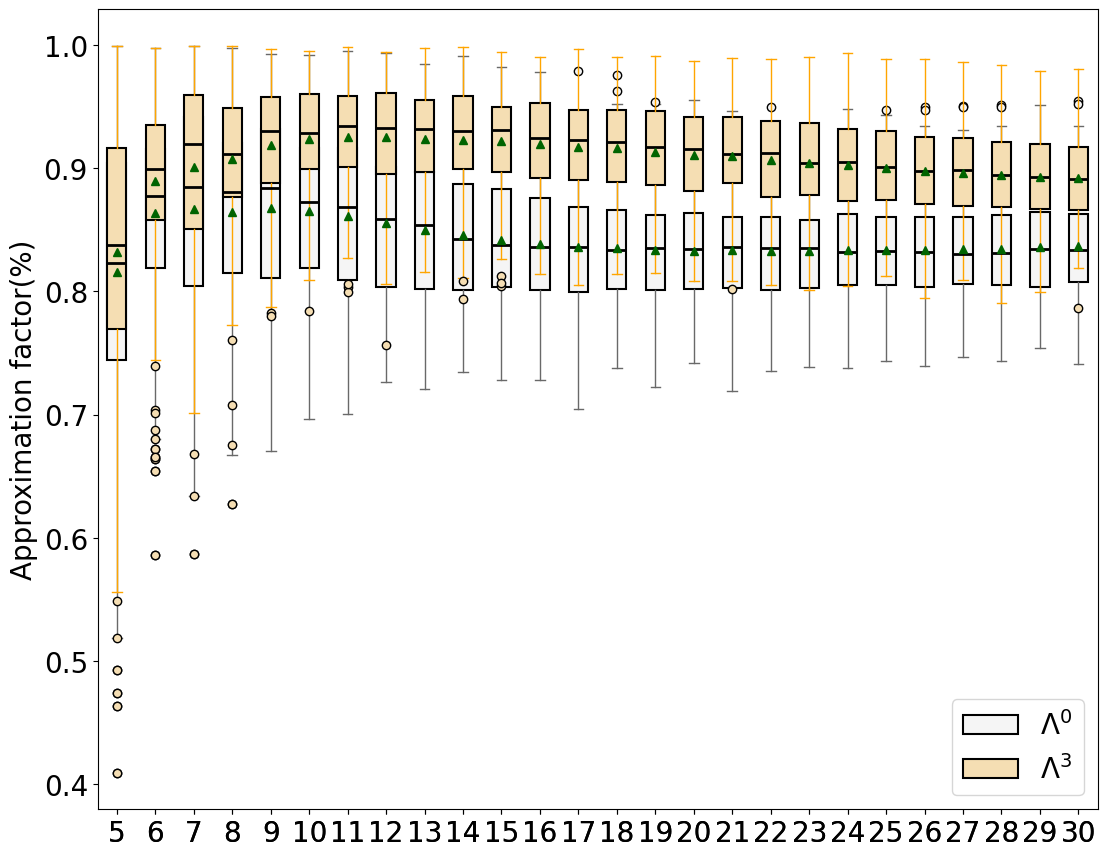

In [81]:
upper_bounds = ["ub1", "ub7", "ub7m"]
algos = ["greedy_max"]
task_name = "FacebookGraphCoverage"
# task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
# task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 1000
start_b = 5
stop_b = 31

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    "ub1m",
    "ub7",
    "ub7m"
]

ub_title_dict = {
    "ub1": "Upper bound 0",
    "ub1m": "Upper bound 1",
    "ub7": "Upper bound 2",
    "ub7m":"Upper bound 3",
}

budget_list = list(range(start_b, stop_b))
budget_mean_list = []
for bd in budget_list:
    budget_mean_list.append([])

budget_title_list = [f"{bd}" for bd in budget_list]

colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

ubs_to_draw_list = [0, 3]

data_list = []

for ub_to_draw in ubs_to_draw_list:
    for seed in seed_range:
        root_dir = os.path.join("../result/archive-4", path_dict[task_name] + suffix, f"{n}",f"{seed}")
        
        # for i in range(0, len(ub_list)):
        ub = ub_list[ub_to_draw]
        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        W_dict = {}
        for i in range(0, len(X)):
            budget = int(X[i])
            W_dict[budget] = W[i]

        for bd in budget_list:
            # print(f"bd:{bd}, W_dict:{W_dict.keys()}")
            print(f"seed:{seed}, bd:{bd}, af:{W_dict[bd]}")
            budget_mean_list[bd - start_b].append(W_dict[bd])


        print(f"progress:{seed + 1}/{200}")
    data_list.append(budget_mean_list)
    budget_mean_list = []
    for bd in budget_list:
        budget_mean_list.append([])
    

# data = budget_mean_list

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor(%)")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)
mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
whisker_props = {"color":"black"}

color_list = ["whitesmoke","wheat"]

whisker_color_list = ["dimgray","orange"]

ub_label_dict = {
    "ub0":r"$\Lambda^0$",
    "ub1":r"$\Lambda^3$"
}

for i in range(0, len(data_list)):
    data = data_list[i]

    flier_props["markerfacecolor"] = color_list[i]
    whisker_props["color"] = whisker_color_list[i]

    bp = ax.boxplot(data,label=ub_label_dict[f"ub{i}"], patch_artist=True, tick_labels=budget_title_list, showmeans=True, boxprops=box_props, medianprops=median_props
                    , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

    for median in bp["medians"]:
        median.set_color("black")
    for box in bp["boxes"]:
        box.set_facecolor(color_list[i])

plt.legend()


plt.show()